## **Lab 2: Linear Regression**

#### **Objective:**
- Create and Train Linear Regression Model
- Compare between Single Feature and Multiple Feature Regression Models

##### *Submitted By: Sulav Karki (ACE079BCT070)*

#### **Theory:**

Linear Regression is a supervised machine learning algorithm that is used to model the relationship between a dependent variable and independent variable (may be one or many) by fitting a linear equation to observe a dataset.

For Single Variable Linear Regression the equation used is:  
            $$
            y = wX + b 
            $$
        where: X: input for the model  
               y: output of the model for the given X  
               w,b: parameters for the best fit usually referred as $\theta$  

                  
For Multiple Variable Linear Regression the equation used is:  
            $$
            y = w1​*X1 ​+ w2*X2 ​+⋯+ b  
            $$
        where: Xn,X1,X2: Input for the model  
               y: output for inputs X  
               w,b: parameters for the best fit usually referred as $\theta$  

### Task 1: Single Feature Regression Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('E:/Sulav/Program/AI lab/Lab2_Assignment/housing.csv')
df.head()
print(df.shape)
print(df.info())
print(df.columns)

(20640, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [3]:

df.sum().isnull()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [4]:

df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:

print(df.shape)

(20640, 10)


In [6]:

cleaned_df = df.dropna()
print(cleaned_df.shape)

(20433, 10)


In [7]:

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:

X1 = cleaned_df[["total_rooms"]]
y1 = cleaned_df["median_house_value"]
print(X1.shape)
print(y1.shape)

(20433, 1)
(20433,)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42
)

trainModel1 = LinearRegression()
trainModel1.fit(X1_train, y1_train)
print("Task 1: Training completed.")


Task 1: Training completed.


In [10]:
trainCoeff1 = trainModel1.coef_[0]
trainInter1 = trainModel1.intercept_

print("Task 1 coefficient:", trainCoeff1)
print("Task 1 intercept:", trainInter1)

Task 1 coefficient: 7.268859007247567
Task 1 intercept: 187554.24317975526


In [11]:

import matplotlib.pyplot as plt

In [12]:

y1_pred = trainModel1.predict(X1_test)

mse1 = mean_squared_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)

print("Task 1 - MSE:", mse1)
print("Task 1 - R² :", r2_1)

Task 1 - MSE: 13473654194.636814
Task 1 - R² : 0.014736667438976503


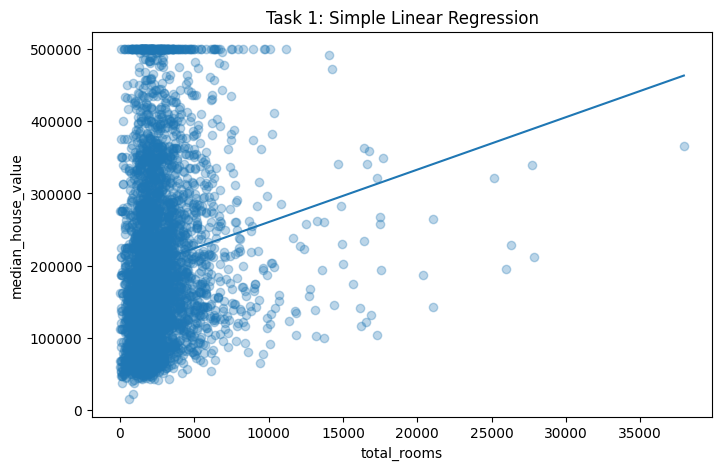

In [13]:
# Sort for a clean line
order = np.argsort(X1_test.values.flatten())
X_sorted = X1_test.values.flatten()[order]
y_sorted_pred = y1_pred[order]

plt.figure(figsize=(8,5))
plt.scatter(X1_test, y1_test, alpha=0.3)
plt.plot(X_sorted, y_sorted_pred)
plt.xlabel("total_rooms")
plt.ylabel("median_house_value")
plt.title("Task 1: Simple Linear Regression")
plt.show()

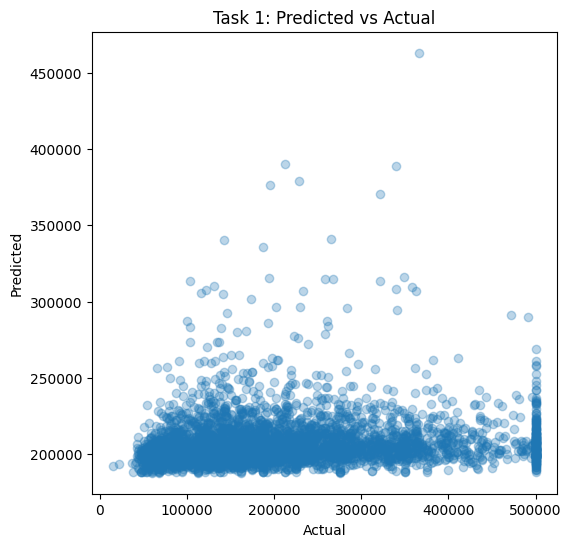

In [14]:

#predicted vs actual 
plt.figure(figsize=(6,6))
plt.scatter(y1_test, y1_pred, alpha=0.3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Task 1: Predicted vs Actual")
plt.show()

### Task 2: Multiple Feature Regression Model

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('E:/Sulav/Program/AI lab/Lab2_Assignment/housing.csv')
df.head()
print(df.shape)
print(df.info())
print(df.columns)

(20640, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [17]:

df.sum().isnull()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [18]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [19]:

print(df.shape)

(20640, 10)


In [20]:

cleaned_df = df.dropna()
print(cleaned_df.shape)

(20433, 10)


In [21]:

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [22]:

X2 = cleaned_df.drop(columns=["median_house_value"])
y2 = cleaned_df["median_house_value"]
print(X2.shape)
print(y2.shape)

(20433, 9)
(20433,)


In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify columns
num_cols = X2.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X2.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

X2_scaled = preprocessor.fit_transform(X2)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2_scaled, y2, test_size=0.2, random_state=42
)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

print("Task 2: Training completed.")

Task 2: Training completed.


In [25]:

import matplotlib.pyplot as plt

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

y2_pred = model2.predict(X2_test)

mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)

print("Task 2 - MSE:", mse2)
print("Task 2 - R² :", r2_2)

Task 2 - MSE: 4802173538.604159
Task 2 - R² : 0.6488402154431994


In [27]:

feature_names = preprocessor.get_feature_names_out()

coef_table = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": model2.coef_.ravel()
}).sort_values(by="Coefficient", ascending=False)

coef_table

,Feature,Coefficient
10,cat__ocean_proximity_ISLAND,179383.931076
7,num__median_income,74596.794611
4,num__total_bedrooms,43403.303232
6,num__households,16493.026736
2,num__housing_median_age,13615.994239
3,num__total_rooms,-13815.254127
12,cat__ocean_proximity_NEAR OCEAN,-31102.966259
8,cat__ocean_proximity_<1H OCEAN,-34269.443387
11,cat__ocean_proximity_NEAR BAY,-40501.860264
5,num__population,-41258.829711


In [28]:

print("Task 1: MSE:", mse1, " R²:", r2_1)
print("Task 2: MSE:", mse2, " R²:", r2_2)

Task 1: MSE: 13473654194.636814  R²: 0.014736667438976503
Task 2: MSE: 4802173538.604159  R²: 0.6488402154431994


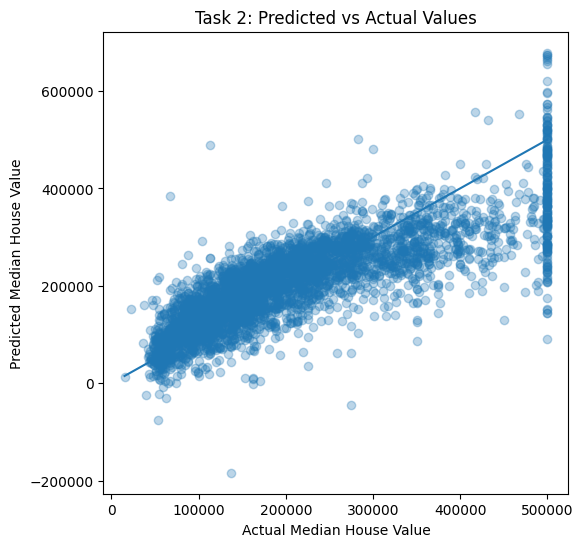

In [29]:

plt.figure(figsize=(6,6))
plt.scatter(y2_test, y2_pred, alpha=0.3)
plt.plot([y2_test.min(), y2_test.max()],
         [y2_test.min(), y2_test.max()])
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Task 2: Predicted vs Actual Values")
plt.show()

### Discussion and Conclusion

In this lab of AI, we implemented single and multi feature linear regression using the housing dataset. The Single Feature Regression Model used only total_rooms and showed very poor performance, with a high Mean Square Error(MSE) and an r squared value, which indicated that this feature alone cannot properly explain house price. Then, in multiple linear regression, we took all features except the target as input and model achieved a lower MSE and a higher r squared value, which showed that house prices are influenced by multiple factors such as income, location, and housing characteristics.

